In [ ]:
import pandas as pd

In [ ]:
# reading
df = pd.read_csv('/content/DrugAbuser.csv')
df.head()

,Case_ID,Age,Marital_Status,Employment_Status,Income Level,Health Index,Smoking,psychological_disorder,taken_drugs,dropped_motivation_to_working,...,inablity_to_estimate,dryness_or_Redness,Fatigue_pallor,slow_reactions,difficulty_controlling_emotions,Deterioration_of_physical_appearance,Weighted_Stress_Index,Risk_of_Legal_Issues,Risk_Factor_Score,Drug_or_not
0,AHU235,20,Single,Unemployed,Low Income,2,Yes,No,No,Yes,...,Yes,Yes,Yes,No,Yes,Yes,29.026112,7,2.113028,Yes
1,AHU249,19,Married,Self-employed,Low Income,3,Yes,No,Yes,Yes,...,No,No,No,Yes,No,Yes,18.493526,9,1.911381,Yes
2,AHU123,27,Single,Part-time employed,Lower Middle Income,1,Yes,Yes,Yes,Yes,...,No,No,No,Yes,Yes,Yes,11.990000,3,2.059167,No
3,AHU107,21,Single,Student,Low Income,3,No,No,No,No,...,Yes,No,No,Yes,No,Yes,10.030000,0,1.903612,No
4,AHU144,18,Single,Student,Low Income,1,Yes,No,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,28.187401,5,2.063855,Yes


In [ ]:
df['Smoking']

0      Yes
1      Yes
2      Yes
3       No
4      Yes
      ... 
222     No
223    Yes
224    Yes
225    Yes
226    Yes
Name: Smoking, Length: 227, dtype: object

In [ ]:
df['Age'].mean()

23.740088105726873

In [ ]:
# checking if clean
df.isnull().sum().sum()

In [ ]:
# CHOSEN PROJECT & COLUMNS

'''  Mental Health and Emotional Stability.

Needed Columns

- psychological_disorder
	YES, general info.

- irritable_mood
	YES, emotional stability.

- hallucinations
	YES, mental health.

- unjustified_anxiety_fear
	YES, mental health.

- feeling_in_good_health
- feeling_of_superiority
	YES, emotional stability.
	can also lead to mania (bpd, bipolar, etc.)

- aggressive_behavior
	YES, emotional stability.

- suicidal_behavior
	YES, both.

- difficulty_controlling_emotions
	YES, emotional stability.

- Weighted_Stress_Index
	YES, general info.

10 total columns.
'''

In [ ]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Case_ID                               227 non-null    object 
 1   Age                                   227 non-null    int64  
 2   Marital_Status                        227 non-null    object 
 3   Employment_Status                     227 non-null    object 
 4   Income Level                          227 non-null    object 
 5   Health Index                          227 non-null    int64  
 6   Smoking                               227 non-null    object 
 7   psychological_disorder                227 non-null    object 
 8   taken_drugs                           227 non-null    object 
 9   dropped_motivation_to_working         227 non-null    object 
 10  absence_from_work                     227 non-null    object 
 11  find_exotic_tools  

In [ ]:
df['Age'].describe()

count    227.000000
mean      23.740088
std        7.398178
min       14.000000
25%       18.000000
50%       21.000000
75%       30.000000
max       39.000000
Name: Age, dtype: float64

In [ ]:
df.describe()

,Age,Health Index,Weighted_Stress_Index,Risk_of_Legal_Issues,Risk_Factor_Score
count,227.000000,227.000000,227.000000,227.000000,227.000000
mean,23.740088,2.656388,16.869343,4.334802,1.503809
std,7.398178,1.773949,11.730187,2.998934,0.793593
min,14.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1.000000,3.800000,1.000000,1.063169
50%,21.000000,3.000000,19.921076,5.000000,1.896634
75%,30.000000,5.000000,27.123437,7.000000,2.032541
max,39.000000,5.000000,33.791716,9.000000,3.373045


In [ ]:
df['Age'].value_counts()

Age
20    18
18    17
19    16
21    16
14    14
16    14
15    13
17    12
26    10
27     9
37     8
23     8
31     8
35     8
39     8
30     7
32     7
29     7
36     6
28     6
24     5
33     4
25     4
34     2
Name: count, dtype: int64

In [ ]:
# numerical stats
df.describe()

  # i really only care about stress index and maybe age here.
  # stress: big jump from 25% to 50%, not many outliers it seems.

In [ ]:
# heatmap preparation

# copying df with needed cols
tst = df[['psychological_disorder', 'irritable_mood', 'hallucinations',
               'unjustified_anxiety_fear', 'feeling_in_good_health', 'feeling_of_superiority',
               'aggressive_behavior', 'suicidal_behavior', 'difficulty_controlling_emotions',
               'Weighted_Stress_Index', 'Drug_or_not']].copy()

# label encoder library
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

# cols to encode
cols = ['psychological_disorder', 'irritable_mood', 'hallucinations',
               'unjustified_anxiety_fear', 'feeling_in_good_health', 'feeling_of_superiority',
               'aggressive_behavior', 'suicidal_behavior', 'difficulty_controlling_emotions', 'Drug_or_not']

# for loop for ease
for c in cols:
  tst[c] = lbl.fit_transform(tst[c])
tst.head()

,psychological_disorder,irritable_mood,hallucinations,unjustified_anxiety_fear,feeling_in_good_health,feeling_of_superiority,aggressive_behavior,suicidal_behavior,difficulty_controlling_emotions,Weighted_Stress_Index,Drug_or_not
0,0,1,0,1,0,0,1,1,1,29.026112,1
1,0,1,0,0,0,1,0,1,0,18.493526,1
2,1,0,0,1,1,1,0,0,1,11.990000,0
3,0,0,1,0,0,0,1,0,0,10.030000,0
4,0,1,1,0,1,0,1,1,1,28.187401,1


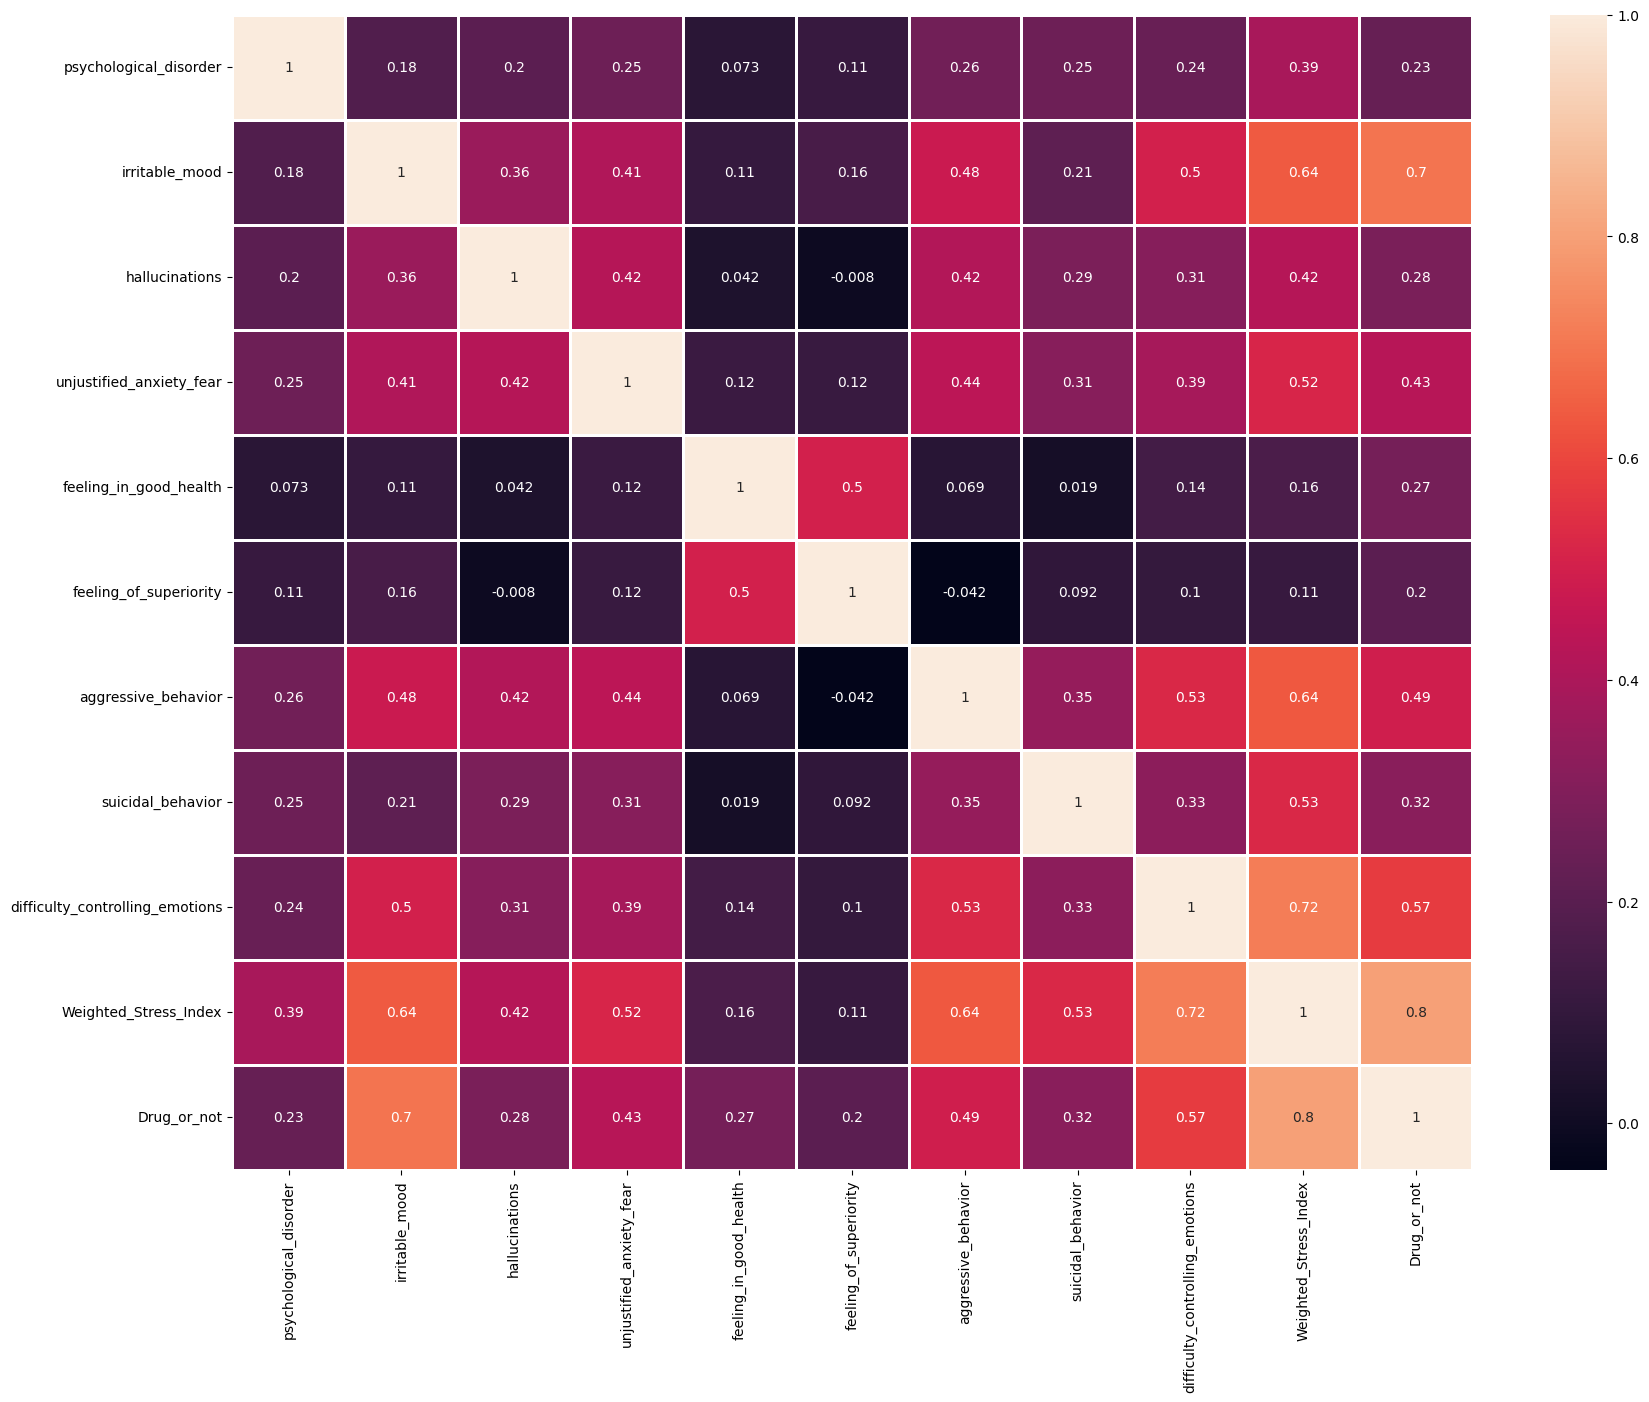

In [ ]:
# heatmap

# libraries needed
import seaborn as sns
import matplotlib.pyplot as plt

# correlation
corr = tst.corr()

# plotting
plt.figure(figsize = (20, 15))
sns.heatmap(corr, annot = True, linewidth = 2)
  # linewidth just breaks apart the squares for clearer vision
plt.show()

In [ ]:
# INSIGHTS.
# there's many so i took a 0.5 > as a threshold
# tho everything else is still notable.

'''

irritable_mood
  difficulty_controlling_emotions = 0.5
  Weighted_Stress_Index = 0.64
  Drug_or_not = 0.7

unjustified_anxiety_fear
  Weighted_Stress_Index = 0.52
  Drug_or_not = 0.53

feeling_in_good_health
  feeling_of_superiority = 0.5

aggressive_behavior
  difficulty_controlling_emotions = 0.53
  Weighted_Stress_Index = 0.64

suicidal_behavior
  Weighted_Stress_Index = 0.53

difficulty_controlling_emotions
  Weighted_Stress_Index = 0.72
  Drug_or_not = 0.57

Weighted_Stress_Index
  Drug_or_not = 0.8 (HUGE)

'''

In [ ]:
# i'll scrap the following 2 columns:
# feeling_in_good_health & feeling_of_superiority

'''
initially i added them bc it could be leading to mania
  > aka problems in mental health &/or emotional instability.
but the heatmap relations don't really support my thinking.
  > and i'm taking the correlation matrix as a baseline.

they do have relations, BUT compared to other columns,
  > it's very negligible. ex: 0.11 compared to 0.25 and above.
'''

In [ ]:
# Dropping the 2 columns
tst.drop(columns = ['feeling_in_good_health', 'feeling_of_superiority'], inplace = True)

In [ ]:
# Redoing heatmap for clearer view
corr = tst.corr()

# plotting
plt.figure(figsize = (20, 15))
sns.heatmap(corr, annot = True, linewidth = 2)
  # linewidth just breaks apart the squares for clearer vision
plt.show()

In [ ]:
df.head()

In [ ]:
# CHOSEN PROJECT & COLUMNS

'''
Mental Health and Emotional Stability.

Needed Columns:
- psychological_disorder
- irritable_mood
- hallucinations
- unjustified_anxiety_fear
- aggressive_behavior
- suicidal_behavior
- difficulty_controlling_emotions
- Weighted_Stress_Index (numerical)

'''

In [ ]:
# STATISTICAL MEASURES: numerical.

In [ ]:
df['Weighted_Stress_Index'].describe()

In [ ]:
# Basic statistical measures.

stress_mean = round(df['Weighted_Stress_Index'].mean(), 3)
stress_median = df['Weighted_Stress_Index'].median()
stress_var = round(df['Weighted_Stress_Index'].var(), 3)
stress_std = round(df['Weighted_Stress_Index'].std(), 3)
stress_cv = round((stress_std / stress_mean) * 100, 3)
stress_max = df['Weighted_Stress_Index'].max()
stress_min = df['Weighted_Stress_Index'].min()
stress_range = stress_max - stress_min
stress_mode = df['Weighted_Stress_Index'].mode()[0]
stress_mode_occurrence = df['Weighted_Stress_Index'].value_counts()[stress_mode]
stress_count = df['Weighted_Stress_Index'].value_counts().unique().sum()
stress_mode_ratio = (stress_mode_occurrence / stress_count) * 100

In [ ]:
print(f'Weighted Stress Index ~ \n\n\
BASICS\n-----\n\
mean: {stress_mean}\n\
median: {stress_median}\n\
variance: {stress_var}\n\
standard deviation: {stress_std}\n\
coefficient of variation: {stress_cv}\n\n\
RANGE\n-----\n\
max: {stress_max}\n\
min: {stress_min}\n\
range: {stress_range}\n\n\
MODE\n-----\n\
mode: {stress_mode}\n\
mode ocurrences: {stress_mode_occurrence}\n\
total values: {stress_count}\n\
mode occurrence to total count: {round(stress_mode_ratio, 2)}%')

In [ ]:
# gotta write some insights here. (later)

In [ ]:
# Insights

'''
The value of coef of var ~70% indicates the ratio of std to mean.
  > this means that the std is lower than the mean.

The value is relatively low, meaning the values of std are not as dispersed around the mean.
  > this shows that a good amount of participants' [Weighted Stress Index] is around the average (mean) & not too far off.
'''

In [ ]:
# MEASURES OF POSITION.

In [ ]:
# Quartiles
stress_q1 = df['Weighted_Stress_Index'].quantile(0.25)
stress_q2 = df['Weighted_Stress_Index'].quantile(0.5)
stress_q3 = df['Weighted_Stress_Index'].quantile(0.75)
stress_iqr = stress_q3 - stress_q1

print(f'Weighted Stress Index (Quantiles) ~\n\n\
Q1: {round(stress_q1, 3)}\n\
Q2: {round(stress_q2, 3)}\n\
Q3: {round(stress_q3, 3)}\n\
IQR: {round(stress_iqr, 3)}')

In [ ]:
# prompt: plot q1 q2 and q3 like the bar chart below for deciles

import matplotlib.pyplot as plt
# plotting
plt.figure(figsize = (20, 15))
plt.bar(x = ['Q1', 'Q2', 'Q3'], height = [stress_q1, stress_q2, stress_q3])
plt.title('Weighted Stress Index (Quartiles)')
plt.show()

In [ ]:
# Plotting percentiles
plt.figure(figsize = (10, 6))
plt.bar(x = ['Q1', 'Q2', 'Q3'], height = [stress_q1, stress_q2, stress_q3],
        color = 'cornflowerblue', edgecolor = 'black')
plt.title('Percentiles of [Weighted Stress Index]')
plt.show()

In [ ]:
import numpy as np

# Deciles
stress_deciles = np.percentile(df['Weighted_Stress_Index'], np.arange(10, 100, 10))

sum = 10
for d in stress_deciles:
  print(f'{sum}th Decile: {round(d, 3)}')
  sum+=10

In [ ]:
# Reference for matplotlib colors: https://www.tutorialexample.com/wp-content/uploads/2021/02/a-full-list-of-matplotlib-color.png

In [ ]:
xaxis = np.arange(10, 100, 10)

# Plotting deciles
plt.figure(figsize = (10, 6))
plt.bar(xaxis, stress_deciles, width = 10, color = 'mediumpurple', edgecolor = 'black')
plt.xlabel('Percentile')
plt.xticks(xaxis)
plt.ylabel('Value')
plt.title('Deciles of [Weighted Stress Index]')
plt.show()

In [ ]:
# Outlier using quartiles

# Lower & higher bounds
qlo_stress = stress_q1 - 1.5 * stress_iqr
qhi_stress = stress_q3 + 1.5 * stress_iqr

# Outlier detection
qlo_stress_outlier = df[(df['Weighted_Stress_Index'] < qlo_stress)]
qhi_stress_outlier = df[(df['Weighted_Stress_Index'] > qhi_stress)]

print(f'Lower Bound Outlier(s): \n\n{qlo_stress_outlier}\n\n\
--------------\n\n\
Higher Bound Outlier(s): \n\n{qhi_stress_outlier}')

In [ ]:
# Insights > surprisingly no outliers.

In [ ]:
# Box Plot

import seaborn as sns
sns.boxplot(x = df['Weighted_Stress_Index'], color = 'mediumpurple')
plt.xlabel('Stress Index')
plt.ylabel('Range')
plt.title('Box Plot of Weighted Stress Index')
plt.show()

In [ ]:
# Insights
' surely, we can see theres TRULY NO outliers. '

In [ ]:
# Further Stats - Z Score
from scipy.stats import zscore, stats

stress_zscore = stats.zscore(df['Weighted_Stress_Index'])
stress_zmax = stress_zscore.max()
stress_zmin = stress_zscore.min()
stress_zrange = (stress_zmax - stress_zmin)

print(f'Z-Score Info for [Weighted Stress Index]\n\n\
{stress_zscore}\n\n\
Z-Score Max: {round(stress_zmax, 3)}\n\
Z-Score Min: {round(stress_zmin, 3)}\n\
Z-Score Range: {round(stress_zrange, 3)}\n')

In [ ]:
# Outliers: USING Z-SCORE
df['Stress_Zscores'] = stress_zscore
zlo_stress = df[(stress_zscore < -3 )]
zhi_stress = df[(stress_zscore > 3 )]

print(f'Lower Bound Outlier(s): \n\n{zlo_stress}\n\n\
--------------\n\n\
Higher Bound Outlier(s): \n\n{zhi_stress}')

# again, NO outliers.

In [ ]:
# DENSITY for outlier detection.
plt.figure(figsize = [10, 8])
sns.kdeplot(df['Weighted_Stress_Index'], shade = True, color = 'mediumpurple')
plt.title('Density Plot for Stress')
plt.show()

In [ ]:
# DENSITY for outlier detection.
plt.figure(figsize = [10, 8])
sns.distplot(df['Weighted_Stress_Index'], color = 'mediumpurple')
plt.title('Density Plot for Stress')
plt.show()

# Reference: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df['Weighted_Stress_Index'].value_counts().sort_values()

In [ ]:
df.describe()

In [ ]:
# why's it starting at -10.. ??

(array([53., 51., 24., 19., 22., 22., 14., 22.]),
 array([14.   , 17.125, 20.25 , 23.375, 26.5  , 29.625, 32.75 , 35.875,
        39.   ]),
 <BarContainer object of 8 artists>)

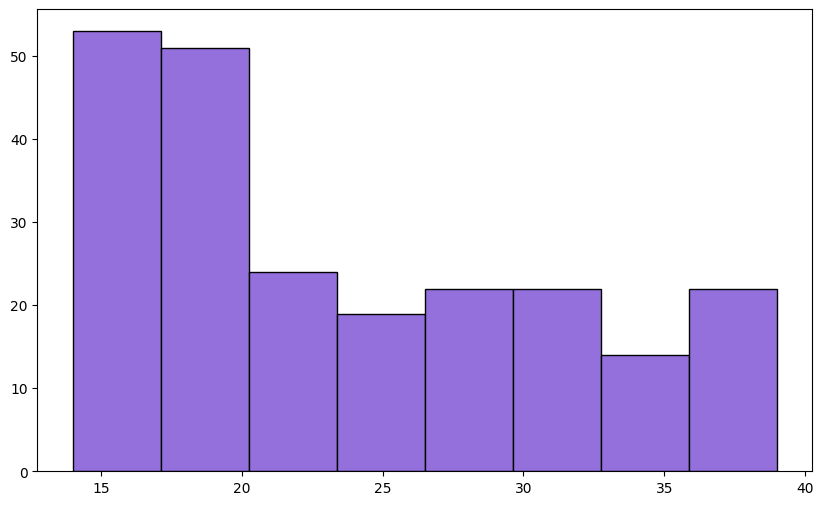

In [ ]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize = (10, 6))
plt.hist(df['Age'], bins = 8, color = 'mediumpurple', edgecolor = 'black') # out of experimenting

In [ ]:
plt.xlabel('Weighted Stress Index')
plt.ylabel('Frequency')
plt.title('Histogram of Weighted Stress Index')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Case_ID                               227 non-null    object 
 1   Age                                   227 non-null    int64  
 2   Marital_Status                        227 non-null    object 
 3   Employment_Status                     227 non-null    object 
 4   Income Level                          227 non-null    object 
 5   Health Index                          227 non-null    int64  
 6   Smoking                               227 non-null    object 
 7   psychological_disorder                227 non-null    object 
 8   taken_drugs                           227 non-null    object 
 9   dropped_motivation_to_working         227 non-null    object 
 10  absence_from_work                     227 non-null    object 
 11  find_exotic_tools  

In [ ]:
df[['Smoking', 'Age', 'Marital_Status']]

,Smoking,Age,Marital_Status
0,Yes,20,Single
1,Yes,19,Married
2,Yes,27,Single
3,No,21,Single
4,Yes,18,Single
...,...,...,...
222,No,32,Married
223,Yes,16,Single
224,Yes,18,Single
225,Yes,20,Single


In [ ]:
# Insights

'''
we can see MOST are in the 0 - 2.5 range (low stress)
then it begins to decrease dramatically
> finally begins increasing around 23 or 24 (high stress)
'''

In [ ]:
# FREQUENCIES: categorical.
# what does this do?

'''
it simply counts the occurrences of each value count
  > relative frequency divides it by the TOTAL for a percentage (%)
    which can be easier to read or comprehend.
'''

In [ ]:
# Plotting for easy frequency visualization.

def freqPie(column):
  count = df[column].value_counts()
  plt.figure(figsize = (10, 6))
  plt.pie(count, labels = df[column].unique(), autopct = '%1.1f%%',
          startangle = 90, colors = ['mediumpurple', 'cornflowerblue'], shadow = True)
          # Parameters Reference: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
  plt.title(f'Ratio of [\'{column}\'] Answers to Total')
  plt.show()

In [ ]:
psych_freq = df['psychological_disorder'].value_counts()
psych_total = df['psychological_disorder'].count()
psych_relative = (psych_freq / psych_total) * 100

psych_relative
  # no is greater.

In [ ]:
psych_mode = df['psychological_disorder'].mode()[0]
psych_mode_occurrence = df['psychological_disorder'].value_counts()[psych_mode]
psych_count = df['psychological_disorder'].value_counts().sum()
psych_mode_ratio = (psych_mode_occurrence / psych_count) * 100

print(f'MODE\n-----\n\
mode: {psych_mode}\n\
mode ocurrences: {psych_mode_occurrence}\n\
total values: {psych_count}\n\
mode occurrence to total count: {round(psych_mode_ratio, 2)}%')

# Quick Note:
'''
Mode for categorical in *this* case is kinda useless.
  > we only have 2 values so it's clear what the mode is.
  > i've still done this for experimentation & proof.
  > so.. no need to do it for the rest.
'''

In [ ]:
freqPie('psychological_disorder')

In [ ]:
mood_freq = df['irritable_mood'].value_counts()
mood_total = df['irritable_mood'].count()
mood_relative = (mood_freq / mood_total) * 100

mood_relative
  # almost 50/50, but yes is more.

In [ ]:
freqPie('irritable_mood')

In [ ]:
hallucinations_freq = df['hallucinations'].value_counts()
hallucinations_total = df['hallucinations'].count()
hallucinations_relative = (hallucinations_freq / hallucinations_total) * 100

hallucinations_relative
  # no is greater.

In [ ]:
freqPie('hallucinations')

In [ ]:
anxiety_freq = df['unjustified_anxiety_fear'].value_counts()
anxiety_total = df['unjustified_anxiety_fear'].count()
anxiety_relative = (anxiety_freq / anxiety_total) * 100

anxiety_relative
  # no is greater.

In [ ]:
freqPie('unjustified_anxiety_fear')

In [ ]:
aggression_freq = df['aggressive_behavior'].value_counts()
aggression_total = df['aggressive_behavior'].count()
aggression_relative = (aggression_freq / aggression_total) * 100

aggression_relative
  # almost 50/50, but no greater

In [ ]:
freqPie('aggressive_behavior')

In [ ]:
suicidal_freq = df['suicidal_behavior'].value_counts()
suicidal_total = df['suicidal_behavior'].count()
suicidal_relative = (suicidal_freq / suicidal_total) * 100

suicidal_relative
  # no is greater

In [ ]:
freqPie('suicidal_behavior')

In [ ]:
emotional_freq = df['difficulty_controlling_emotions'].value_counts()
emotional_total = df['difficulty_controlling_emotions'].count()
emotional_relative = (emotional_freq / emotional_total) * 100

emotional_relative
  # 50/50

In [ ]:
freqPie('difficulty_controlling_emotions')

In [ ]:
drug_freq = df['Drug_or_not'].value_counts()
drug_total = df['Drug_or_not'].count()
drug_relative = (drug_freq / drug_total) * 100

drug_relative
  # yes is more

In [ ]:
freqPie('Drug_or_not')

In [ ]:
# freqnecy INSIGHTS

'''
it's hard to tell anything from this.
'''

In [ ]:
# GROUPBY:

In [ ]:
stress_by_psych0 = df.groupby('psychological_disorder')['Weighted_Stress_Index'].count()
stress_by_psych1 = df.groupby('psychological_disorder')['Weighted_Stress_Index'].mean()

print(f'{stress_by_psych0}\n\n{stress_by_psych1}')

In [ ]:
stress_by_mood0 = df.groupby('irritable_mood')['Weighted_Stress_Index'].count()
stress_by_mood1 = df.groupby('irritable_mood')['Weighted_Stress_Index'].mean()

print(f'{stress_by_mood0}\n\n{stress_by_mood1}')

In [ ]:
stress_by_hallucinations0 = df.groupby('hallucinations')['Weighted_Stress_Index'].count()
stress_by_hallucinations1 = df.groupby('hallucinations')['Weighted_Stress_Index'].mean()

print(f'{stress_by_hallucinations0}\n\n{stress_by_hallucinations1}')

In [ ]:
stress_by_anxiety0 = df.groupby('unjustified_anxiety_fear')['Weighted_Stress_Index'].count()
stress_by_anxiety1 = df.groupby('unjustified_anxiety_fear')['Weighted_Stress_Index'].mean()

print(f'{stress_by_anxiety0}\n\n{stress_by_anxiety1}')

In [ ]:
stress_by_aggression0 = df.groupby('aggressive_behavior')['Weighted_Stress_Index'].count()
stress_by_aggression1 = df.groupby('aggressive_behavior')['Weighted_Stress_Index'].mean()

print(f'{stress_by_aggression0}\n\n{stress_by_aggression1}')

In [ ]:
stress_by_suicidal0 = df.groupby('suicidal_behavior')['Weighted_Stress_Index'].count()
stress_by_suicidal1 = df.groupby('suicidal_behavior')['Weighted_Stress_Index'].mean()

print(f'{stress_by_suicidal0}\n\n{stress_by_suicidal1}')

In [ ]:
stress_by_emotional0 = df.groupby('difficulty_controlling_emotions')['Weighted_Stress_Index'].count()
stress_by_emotional1 = df.groupby('difficulty_controlling_emotions')['Weighted_Stress_Index'].mean()

print(f'{stress_by_emotional0}\n\n{stress_by_emotional1}')

In [ ]:
stress_by_drugs0 = df.groupby('Drug_or_not')['Weighted_Stress_Index'].count()
stress_by_drugs1 = df.groupby('Drug_or_not')['Weighted_Stress_Index'].mean()

print(f'{stress_by_drugs0}\n\n{stress_by_drugs1}')

In [ ]:
# INSIGHTS
# when = yes, avg. stress is 23 and up (very high)

In [ ]:
# BAR GRAPH for above groupbys.

In [ ]:
# Needed data
cols = ['Psych. Disorder', 'Irritable Mood', 'Hallucinations',
        'Unjustified Anxiety Fear',' Aggressive Behavior', 'Suicidal Behavior',
        'Difficulty Controlling Emotions', 'Drug or Not']
mean = [stress_by_psych1, stress_by_mood1, stress_by_hallucinations1,
        stress_by_anxiety1, stress_by_aggression1, stress_by_suicidal1,
        stress_by_emotional1, stress_by_drugs1]

# Plotting
plt.figure(figsize = (18, 12))
plt.bar(cols, [m.mean() for m in mean], color = 'mediumpurple', edgecolor = 'black')
plt.xlabel('Columns')
plt.ylabel('Weighted Stress Index (Mean)')
plt.title('Weighted Stress Index (Mean) by Column')
plt.tight_layout()
plt.show()

# Why? > helps us visualize which contributes to highest avg. stress
# Highest = suicidal behavior, then psych. disorder

In [ ]:
# CONTINGENCY TABLES

In [ ]:
# Function for plotting for effiency
def stackedBar(cross):

  # Loop to go through values in crosstab table.
  for i, data in enumerate(cross):

    # All cols & rows besides 'All' in crosstab table
    data = data.iloc[:-1, :-1]
    plt.figure(figsize = (10, 6))
    data.plot(kind = 'bar', rot = 0, color = ['mediumpurple', 'cornflowerblue'], edgecolor = 'black')

    # Labeling it according to crosstab index & col names
    plt.title(f'{data.index.name} vs. {data.columns.name}')
    plt.xlabel(f'{data.index.name}')
    plt.ylabel('Frequency')

    # Printing
    plt.show()

In [ ]:
# Row percentages
def rowPercent(cross):
  for i, row in enumerate(cross):
    cross[i] = row.div(row['All'], axis = 0) * 100
    print(f'{cross[i]}\n\n')

# Column percentages
def colPercent(cross):
  for i, col in enumerate(cross):
    cross[i] = col.div(col.loc['All'], axis = 1) * 100
    print(f'{cross[i]}\n\n')

In [ ]:
psych_cross0 = pd.crosstab(df['psychological_disorder'], df['unjustified_anxiety_fear'], margins = True)
psych_cross1 = pd.crosstab(df['psychological_disorder'], df['aggressive_behavior'], margins = True)
psych_cross2 = pd.crosstab(df['psychological_disorder'], df['suicidal_behavior'], margins = True)
psych_cross3 = pd.crosstab(df['psychological_disorder'], df['difficulty_controlling_emotions'], margins = True)
psych_cross4 = pd.crosstab(df['psychological_disorder'], df['Drug_or_not'], margins = True)

print(f'{psych_cross0}\n\n\
{psych_cross1}\n\n\
{psych_cross2}\n\n\
{psych_cross3}\n\n\
{psych_cross4}')

# psych x anxiety: no > no
# psych x aggression: not too clear. (SCRAP)
# psych x suicidal: no > no
# psych x emotonal: not too clear. (SCRAP)

unjustified_anxiety_fear   No  Yes  All
psychological_disorder                 
No                        109   46  155
Yes                        32   40   72
All                       141   86  227

aggressive_behavior      No  Yes  All
psychological_disorder               
No                       97   58  155
Yes                      25   47   72
All                     122  105  227

suicidal_behavior        No  Yes  All
psychological_disorder               
No                      120   35  155
Yes                      38   34   72
All                     158   69  227

difficulty_controlling_emotions   No  Yes  All
psychological_disorder                        
No                                89   66  155
Yes                               23   49   72
All                              112  115  227

Drug_or_not             No  Yes  All
psychological_disorder              
No                      62   93  155
Yes                     12   60   72
All                     74  153  

In [ ]:
# Stacked bar chart
psych_cross_data = [psych_cross0, psych_cross1, psych_cross2, psych_cross3, psych_cross4]
stackedBar(psych_cross_data)

In [ ]:
# Row percentage
psych_cross_data = [psych_cross0, psych_cross1, psych_cross2, psych_cross3, psych_cross4]
rowPercent(psych_cross_data)

In [ ]:
# Column percentage
psych_cross_data = [psych_cross0, psych_cross1, psych_cross2, psych_cross3, psych_cross4]
colPercent(psych_cross_data)

In [ ]:
# IRRITABLE MOOD: Contingency Table(s)
mood_cross0 = pd.crosstab(df['irritable_mood'], df['hallucinations'], margins = True)
mood_cross1 = pd.crosstab(df['irritable_mood'], df['unjustified_anxiety_fear'], margins = True)
mood_cross2 = pd.crosstab(df['irritable_mood'], df['aggressive_behavior'], margins = True)
mood_cross3 = pd.crosstab(df['irritable_mood'], df['difficulty_controlling_emotions'], margins = True)
mood_cross4 = pd.crosstab(df['irritable_mood'], df['Drug_or_not'], margins = True)

print(f'{mood_cross0}\n\n\
{mood_cross1}\n\n\
{mood_cross2}\n\n\
{mood_cross3}\n\n\
{mood_cross4}')

# INSIGHTS
'''
mood x emotional: no > no, yes > yes
mood x drugs: yes > yes
mood x anxiety: no > no
mood x aggression: no > no, kinda yes > yes
'''

hallucinations   No  Yes  All
irritable_mood               
No               83   16   99
Yes              63   65  128
All             146   81  227

unjustified_anxiety_fear   No  Yes  All
irritable_mood                         
No                         84   15   99
Yes                        57   71  128
All                       141   86  227

aggressive_behavior   No  Yes  All
irritable_mood                    
No                    80   19   99
Yes                   42   86  128
All                  122  105  227

difficulty_controlling_emotions   No  Yes  All
irritable_mood                                
No                                77   22   99
Yes                               35   93  128
All                              112  115  227

Drug_or_not     No  Yes  All
irritable_mood              
No              69   30   99
Yes              5  123  128
All             74  153  227


'\nmood x emotional: no > no, yes > yes\nmood x drugs: yes > yes\nmood x anxiety: no > no\nmood x aggression: no > no, kinda yes > yes\n'

In [ ]:
# Stacked bar chart
mood_cross_data = [mood_cross0, mood_cross1, mood_cross2, mood_cross3, mood_cross4]
stackedBar(mood_cross_data)

In [ ]:
# Row percentage
mood_cross_data = [mood_cross0, mood_cross1, mood_cross2, mood_cross3, mood_cross4]
rowPercent(mood_cross_data)

In [ ]:
# Column percentage
mood_cross_data = [mood_cross0, mood_cross1, mood_cross2, mood_cross3, mood_cross4]
colPercent(mood_cross_data)

In [ ]:
# HALLUCINATIONS: Contingency Table(s)
hallucinations_cross0 = pd.crosstab(df['hallucinations'], df['unjustified_anxiety_fear'], margins = True)
hallucinations_cross1 = pd.crosstab(df['hallucinations'], df['aggressive_behavior'], margins = True)
hallucinations_cross2 = pd.crosstab(df['hallucinations'], df['suicidal_behavior'], margins = True)
hallucinations_cross3 = pd.crosstab(df['hallucinations'], df['difficulty_controlling_emotions'], margins = True)
hallucinations_cross4 = pd.crosstab(df['hallucinations'], df['Drug_or_not'], margins = True)

print(f'{hallucinations_cross0}\n\n\
{hallucinations_cross1}\n\n\
{hallucinations_cross2}\n\n\
{hallucinations_cross3}\n\n\
{hallucinations_cross4}')

# INSIGHTS
# x anxiety: no > no
# x aggression: no > no, yes > yes
# x emotional: not too clear
# x drugs: yes > yes

In [ ]:
# Stack bar chart
hallucinations_cross_data = [hallucinations_cross0, hallucinations_cross1, hallucinations_cross2,
                             hallucinations_cross3, hallucinations_cross4]
stackedBar(hallucinations_cross_data)

In [ ]:
# Row percentage
hallucinations_cross_data = [hallucinations_cross0, hallucinations_cross1, hallucinations_cross2,
                             hallucinations_cross3, hallucinations_cross4]
rowPercent(hallucinations_cross_data)

In [ ]:
# Column percentage
hallucinations_cross_data = [hallucinations_cross0, hallucinations_cross1, hallucinations_cross2,
                             hallucinations_cross3, hallucinations_cross4]
colPercent(hallucinations_cross_data)

In [ ]:
# UNJUSTIFIED ANXIETY/FEAR: Contingency Table(s)
anxiety_cross0 = pd.crosstab(df['unjustified_anxiety_fear'], df['aggressive_behavior'], margins = True)
anxiety_cross1 = pd.crosstab(df['unjustified_anxiety_fear'], df['suicidal_behavior'], margins = True)
anxiety_cross2 = pd.crosstab(df['unjustified_anxiety_fear'], df['difficulty_controlling_emotions'], margins = True)
anxiety_cross3 = pd.crosstab(df['unjustified_anxiety_fear'], df['Drug_or_not'], margins = True)

print(f'{anxiety_cross0}\n\n\
{anxiety_cross1}\n\n\
{anxiety_cross2}\n\n\
{anxiety_cross3}')

# INSIGHTS

# x aggresion: no > no, yes > yes
# x suicidal: no > no
# x emotional: no > no, yes > yes
# x drugs: yes > yes

In [ ]:
anxiety_cross_data = [anxiety_cross0, anxiety_cross1, anxiety_cross2, anxiety_cross3]

# Stack bar chart
stackedBar(anxiety_cross_data)

In [ ]:
# Row percentage
anxiety_cross_data = [anxiety_cross0, anxiety_cross1, anxiety_cross2, anxiety_cross3]
rowPercent(anxiety_cross_data)

In [ ]:
# Column percent
anxiety_cross_data = [anxiety_cross0, anxiety_cross1, anxiety_cross2, anxiety_cross3]
colPercent(anxiety_cross_data)

In [ ]:
# AGGRESSIVE BEHAVIOR: Contingency Table(s)
aggression_cross0 = pd.crosstab(df['aggressive_behavior'], df['suicidal_behavior'], margins = True)
aggression_cross1 = pd.crosstab(df['aggressive_behavior'], df['difficulty_controlling_emotions'], margins = True)
aggression_cross2 = pd.crosstab(df['aggressive_behavior'], df['Drug_or_not'], margins = True)

print(f'{aggression_cross0}\n\n\
{aggression_cross1}\n\n\
{aggression_cross2}')

In [ ]:
aggression_cross_data = [aggression_cross0, aggression_cross1, aggression_cross2]

# Stack bar chart
stackedBar(aggression_cross_data)

In [ ]:
# Row percent
aggression_cross_data = [aggression_cross0, aggression_cross1, aggression_cross2]
rowPercent(aggression_cross_data)

In [ ]:
# Column percent
aggression_cross_data = [aggression_cross0, aggression_cross1, aggression_cross2]
colPercent(aggression_cross_data)

In [ ]:
# SUICIDAL BEHAVIOR: Contingency Table(s)
suicidal_cross0 = pd.crosstab(df['suicidal_behavior'], df['difficulty_controlling_emotions'], margins = True)
suicidal_cross1 = pd.crosstab(df['suicidal_behavior'], df['Drug_or_not'], margins = True)

print(f'{suicidal_cross0}\n\n\
{suicidal_cross1}')

In [ ]:
suicidal_cross_data = [suicidal_cross0, suicidal_cross1]

# Stacked bar chart(s)
stackedBar(suicidal_cross_data)

In [ ]:
# Row percentage
suicidal_cross_data = [suicidal_cross0, suicidal_cross1]
rowPercent(suicidal_cross_data)

In [ ]:
# Column percentage
suicidal_cross_data = [suicidal_cross0, suicidal_cross1]
colPercent(suicidal_cross_data)

In [ ]:
# DIFFICULTY CONTROLLING EMOTIONS: Contingency Table(s)
emotional_cross0 = pd.crosstab(df['difficulty_controlling_emotions'], df['aggressive_behavior'], margins = True)
emotional_cross1 = pd.crosstab(df['difficulty_controlling_emotions'], df['Drug_or_not'], margins = True)

print(f'{emotional_cross0}\n\n\
{emotional_cross1}')

In [ ]:
emotional_cross_data = [emotional_cross0, emotional_cross1]

# Stacked bar chart(s)
stackedBar(emotional_cross_data)

In [ ]:
# Row percentage
emotional_cross_data = [emotional_cross0, emotional_cross1]
rowPercent(emotional_cross_data)

In [ ]:
# Column percentage
emotional_cross_data = [emotional_cross0, emotional_cross1]
colPercent(emotional_cross_data)

In [ ]:
# mainly what i'm focusing on.

# DRUG OR NOT: Contingency Table(s)
drug_cross0 = pd.crosstab(df['Drug_or_not'], df['psychological_disorder'], margins = True)
drug_cross1 = pd.crosstab(df['Drug_or_not'], df['irritable_mood'], margins = True)
drug_cross2 = pd.crosstab(df['Drug_or_not'], df['hallucinations'], margins = True)
drug_cross3 = pd.crosstab(df['Drug_or_not'], df['unjustified_anxiety_fear'], margins = True)
drug_cross4 = pd.crosstab(df['Drug_or_not'], df['aggressive_behavior'], margins = True)
drug_cross5 = pd.crosstab(df['Drug_or_not'], df['suicidal_behavior'], margins = True)
drug_cross6 = pd.crosstab(df['Drug_or_not'], df['difficulty_controlling_emotions'], margins = True)

print(f'{drug_cross0}\n\n\
{drug_cross1}\n\n\
{drug_cross2}\n\n\
{drug_cross3}\n\n\
{drug_cross4}\n\n\
{drug_cross5}\n\n\
{drug_cross6}')

# big 'Yes' indications: irritable_mood and difficulty_controlling_emotions (if yes > yes)
# rest are big 'No' indications (if no > no)

In [ ]:
drug_cross0

In [ ]:
drug_cross1

In [ ]:
drug_cross2

In [ ]:
drug_cross3

In [ ]:
drug_cross4

In [ ]:
drug_cross5

In [ ]:
drug_cross6

In [ ]:
drug_cross_data = [drug_cross0, drug_cross1, drug_cross2, drug_cross3,
                   drug_cross4, drug_cross5, drug_cross6]

# bar chart(s)
stackedBar(drug_cross_data)

In [ ]:
# Row percentage
drug_cross_data = [drug_cross0, drug_cross1, drug_cross2, drug_cross3,
                   drug_cross4, drug_cross5, drug_cross6]
rowPercent(drug_cross_data)

In [ ]:
# Column percent
drug_cross_data = [drug_cross0, drug_cross1, drug_cross2, drug_cross3,
                   drug_cross4, drug_cross5, drug_cross6]
colPercent(drug_cross_data)

In [ ]:
# Continuing groupby based on contingency tables.

In [ ]:
drug_grouped0 = df.groupby(['irritable_mood', 'difficulty_controlling_emotions', 'Drug_or_not'])['Drug_or_not'].count()
drug_grouped0

# so when irritable mood = no, emotion > no and drug > no
# VICE VERSA.

In [ ]:
stress_grouped0 = df.groupby(['unjustified_anxiety_fear', 'difficulty_controlling_emotions'])['Weighted_Stress_Index'].mean()
stress_grouped0

In [ ]:
drug_grouped1 = df.groupby(['aggressive_behavior', 'difficulty_controlling_emotions'])['Drug_or_not'].count()
drug_grouped1

In [ ]:
stress_grouped1 = df.groupby(['aggressive_behavior', 'difficulty_controlling_emotions'])['Weighted_Stress_Index'].mean()
stress_grouped1

In [ ]:
drug_grouped2 = df.groupby(['aggressive_behavior', 'irritable_mood'])['Drug_or_not'].count()
drug_grouped2

In [ ]:
stress_grouped2 = df.groupby(['aggressive_behavior', 'irritable_mood'])['Weighted_Stress_Index'].mean()
stress_grouped2

In [ ]:
drug_grouped3 = df.groupby(['hallucinations', 'difficulty_controlling_emotions'])['Drug_or_not'].count()
drug_grouped3 # meh

In [ ]:
stress_grouped3 = df.groupby(['hallucinations', 'difficulty_controlling_emotions'])['Weighted_Stress_Index'].mean()
stress_grouped3 # meh

In [ ]:
drug_grouped4 = df.groupby(['unjustified_anxiety_fear', 'difficulty_controlling_emotions'])['Drug_or_not'].count()
drug_grouped4

In [ ]:
stress_grouped4 = df.groupby(['unjustified_anxiety_fear', 'difficulty_controlling_emotions'])['Weighted_Stress_Index'].mean()
stress_grouped4

In [ ]:
drug_grouped5 = df.groupby(['unjustified_anxiety_fear', 'aggressive_behavior'])['Drug_or_not'].count()
drug_grouped5 # good one

In [ ]:
stress_grouped5 = df.groupby(['unjustified_anxiety_fear', 'aggressive_behavior'])['Weighted_Stress_Index'].mean()
stress_grouped5 # good one

In [ ]:
yes_drug = df[df['Drug_or_not'] == 'Yes']
drug_grouped6 = df.groupby(['suicidal_behavior', 'difficulty_controlling_emotions']).count()
drug_grouped6 # kinda good too.

In [ ]:
drug_grouped6 = df.groupby(['unjustified_anxiety_fear',
                               'aggressive_behavior', 'suicidal_behavior',
                               'difficulty_controlling_emotions',
                               'irritable_mood', 'Drug_or_not']).count()
drug_grouped6 # kinda good too.

In [ ]:
drug_grouped7 = df.groupby(['unjustified_anxiety_fear',
                               'aggressive_behavior', 'suicidal_behavior',
                               'difficulty_controlling_emotions',
                               'irritable_mood', 'Drug_or_not'])['Drug_or_not'].count()
drug_grouped7 # kinda good too.

In [ ]:
stress_grouped6 = df.groupby(['suicidal_behavior', 'difficulty_controlling_emotions'])['Weighted_Stress_Index'].mean()
stress_grouped6 # kinda good too.

In [ ]:
stress_grouped7 = df.groupby(['aggressive_behavior', 'difficulty_controlling_emotions'])['Weighted_Stress_Index'].mean()
stress_grouped7 # kinda good too.

In [ ]:
stress_grouped8 = df.groupby(['aggressive_behavior', 'suicidal_behavior'])['Weighted_Stress_Index'].mean()
stress_grouped8 # kinda good too.

In [ ]:
stress_grouped9 = df.groupby(['aggressive_behavior', 'suicidal_behavior',
                              'difficulty_controlling_emotions'])['Weighted_Stress_Index'].mean()
stress_grouped9 # kinda good too.

In [ ]:
stress_grouped10 = df.groupby(['aggressive_behavior', 'suicidal_behavior',
                              'difficulty_controlling_emotions',
                               'irritable_mood'])['Weighted_Stress_Index'].mean()
stress_grouped10 # kinda good too.

In [ ]:
stress_grouped11 = df.groupby(['unjustified_anxiety_fear',
                               'aggressive_behavior', 'suicidal_behavior',
                               'difficulty_controlling_emotions',
                               'irritable_mood', 'Drug_or_not'])['Weighted_Stress_Index'].mean()
stress_grouped11 # kinda good too.